## Time Series

#### Time series data is an important form of structured data in many different fields, such as finance, economics, neuroscience, and physics. 
#### Anything that is recorded repeatedly at many points in time forms a time series. 
#### Many time series are fixed frequency, which is to say that data points occur at regular intervals according to some rule, such as every 15 seconds, every 5 minutes, or once per month. 
#### Time series can also be irregular without a fixed unit of time or offset between units. 
#### Time series analysis is used for data that varies over time, such as stock prices, weather data, sales data, etc. 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Creating time series data

In [45]:
# Generate date range
date_rng = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")

# Create a DataFrame with random data
df = pd.DataFrame({
    "Date": date_rng,
    "Sales": np.random.randint(100, 500, size=len(date_rng))
})

# Set "Date" as the index
df.set_index("Date", inplace=True)

# Display the first few rows
print(df.head())

            Sales
Date             
2023-01-01    436
2023-01-02    485
2023-01-03    371
2023-01-04    357
2023-01-05    327


#### Visualizing time series

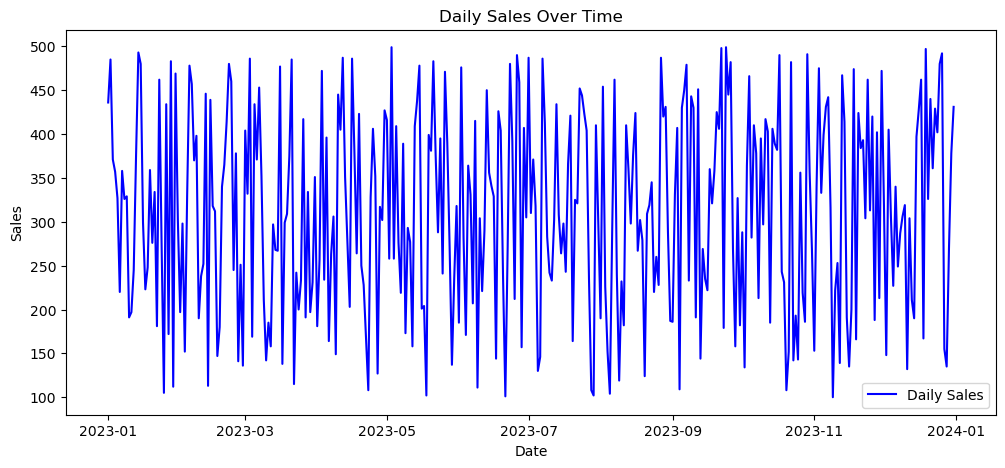

In [46]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Sales"], label="Daily Sales", color="blue")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Daily Sales Over Time")
plt.legend()
plt.show()

### Time Series Basics

#### The Python standard library includes data types for date, time data and calendar-related functionality. 

#### The datetime module in Python is used to work with dates and times. It allows you to get the current date/time, format dates, perform arithmetic, and manipulate time zones.

In [48]:
from datetime import datetime
now = datetime.now()     # Fetching the current data and time

In [49]:
now   # datetime stores both the date and time down to the microsecond.

datetime.datetime(2025, 3, 19, 11, 16, 28, 513452)

In [50]:
now.year, now.month, now.day  # Accessing year, month and day

(2025, 3, 19)

In [51]:
# timedelta is a class which represents the temporal difference between two datetime objects
delta = datetime.now() - datetime(2008, 6, 24, 8, 15)   # difference between dates
delta

datetime.timedelta(days=6112, seconds=10927, microseconds=161083)

In [ ]:
delta.days

In [ ]:
delta.seconds

In [52]:
from datetime import timedelta
start = datetime.now()
start + timedelta(12)

datetime.datetime(2025, 3, 31, 11, 17, 25, 271965)

#### Creating a pandas series using datetime

In [53]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.standard_normal(6), index=dates)

print(ts)

2011-01-02   -0.502502
2011-01-05   -1.118161
2011-01-07    1.068941
2011-01-08   -1.229330
2011-01-10   -0.011830
2011-01-12    1.085942
dtype: float64


### Indexing, Selection, Subsetting

In [54]:
stamp = ts.index[2]
print(stamp)
print(ts[stamp])

2011-01-07 00:00:00
1.0689408153519253


In [55]:
# Passing string as a date for indexing
ts["2011-01-10"]

-0.011830498173966737

#### Slicing

In [56]:
ts[datetime(2011, 1, 7):]

2011-01-07    1.068941
2011-01-08   -1.229330
2011-01-10   -0.011830
2011-01-12    1.085942
dtype: float64

In [58]:
ts[datetime(2011, 1, 4):datetime(2011, 1, 11)]

2011-01-05   -1.118161
2011-01-07    1.068941
2011-01-08   -1.229330
2011-01-10   -0.011830
dtype: float64

### Generating another time series data

In [59]:
longer_ts = pd.Series(np.random.standard_normal(1000), index=pd.date_range("2000-01-01", periods=1000))

In [60]:
longer_ts.head()

2000-01-01    1.628834
2000-01-02   -0.062505
2000-01-03   -1.368975
2000-01-04    0.036741
2000-01-05   -0.995656
Freq: D, dtype: float64

In [61]:
longer_ts.tail()

2002-09-22   -0.382838
2002-09-23    1.065691
2002-09-24    0.625251
2002-09-25   -1.298253
2002-09-26   -1.140115
Freq: D, dtype: float64

In [62]:
# Accessing data for a particular year
longer_ts["2001"]

2001-01-01   -1.722150
2001-01-02    0.318054
2001-01-03    0.328140
2001-01-04    1.206663
2001-01-05   -1.947372
                ...   
2001-12-27   -0.025723
2001-12-28    1.098347
2001-12-29    0.379356
2001-12-30    0.051788
2001-12-31   -0.072139
Freq: D, Length: 365, dtype: float64

In [63]:
# Accessing data for a particular month in a year
longer_ts["2001-05"]

2001-05-01    1.322130
2001-05-02    1.182882
2001-05-03   -0.734993
2001-05-04    0.845498
2001-05-05   -0.075077
2001-05-06   -1.218883
2001-05-07    0.847922
2001-05-08   -0.382271
2001-05-09   -0.125451
2001-05-10    0.858089
2001-05-11   -0.726418
2001-05-12   -1.490368
2001-05-13    1.065010
2001-05-14    0.684560
2001-05-15   -1.740462
2001-05-16   -0.787460
2001-05-17   -1.486338
2001-05-18   -0.952996
2001-05-19   -0.283460
2001-05-20   -0.907020
2001-05-21   -0.258532
2001-05-22   -0.446955
2001-05-23    2.165936
2001-05-24   -0.710822
2001-05-25   -0.508282
2001-05-26    0.882640
2001-05-27   -0.652622
2001-05-28    1.214446
2001-05-29   -0.867946
2001-05-30    0.132225
2001-05-31    0.216356
Freq: D, dtype: float64

#### Creating a dataframe using datetime

In [64]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")

long_df = pd.DataFrame(np.random.standard_normal((100, 4)), index=dates, columns=["Colorado", "Texas", "New York", "Ohio"])

long_df.head()

,Colorado,Texas,New York,Ohio
2000-01-05,0.761654,0.916206,-0.130762,0.174141
2000-01-12,-0.679556,-0.433826,1.184208,-1.679840
2000-01-19,0.632782,0.390599,-0.121733,-0.449730
2000-01-26,-1.977166,-0.671176,0.261917,0.343934
2000-02-02,0.705539,1.449451,1.284427,0.236148


In [65]:
# Indexing using loc
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,-0.007615,1.594109,0.679936,-0.971974
2001-05-09,-1.042776,-1.077562,-0.511963,2.172489
2001-05-16,-0.638026,-1.017851,-1.172244,-0.159408
2001-05-23,-0.648938,-0.016418,-0.229195,-0.240422
2001-05-30,0.637659,0.966755,1.323287,-1.022231


#### Time Series with Duplicate Indices

In [66]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02", "2000-01-02", "2000-01-03"])

dup_ts = pd.Series(np.arange(5), index=dates)

dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [67]:
# Checking whether index 
dup_ts.index.is_unique

False

##### Indexing time series with duplicate index values

In [68]:
dup_ts["2000-01-03"]    # This is not a duplicate index

4

In [69]:
dup_ts["2000-01-02"]    # This is a duplicate index. Output is a slice

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

##### Aggregating data having nonunique timestamps

In [70]:
grouped = dup_ts.groupby(level = 0)

In [71]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [72]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64